In [1]:
import numpy as np
from scipy import ndimage, misc
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix

In [39]:
def extract_train_set(images, images_output, n=10):
    x = []
    y = []
    for k in range(n):
        for i in range(images[k].shape[0]):
            for j in range(images[k].shape[1]):
                x.append(images[k][i, j])
                y.append(images_output[k][i, j])
    return np.array(x), np.array(y)

def extract_test_set(images, images_output, n=10):
    x = []
    y = []
    
    for k in range(n):
        x.append([])
        y.append([])
        for i in range(images[k].shape[0]):
            for j in range(images[k].shape[1]):
                x[k].append(images[k][i, j])
                y[k].append(images_output[k][i, j])
    return np.array(x), np.array(y)

def get_dataset(): 
    TRAINING_PATH = os.path.join("DRIVE", "training")
    X_training_images = np.array([misc.imread(os.path.join(TRAINING_PATH, "images", f)) for f in os.listdir(os.path.join(TRAINING_PATH, "images"))])
    y_training_images = np.array([misc.imread(os.path.join(TRAINING_PATH, "1st_manual", f)) for f in os.listdir(os.path.join(TRAINING_PATH, "1st_manual"))])
    return X_training_images, y_training_images

def show_prediction(model, X_test, y_test):
    for k in range(X_test.shape[0]):
        print("Image:", k)
        print("Predicting..")
        y_pred = model.predict(X_scaler.transform(X_test[k]))
        print(confusion_matrix(y_test[k], y_pred))
        print("Predicted:")
        plt.imshow(y_pred.reshape(584, 565), cmap=plt.cm.gray)
        plt.show()
        print("Real:")
        plt.imshow(y_test[k].reshape(584, 565), cmap=plt.cm.gray)
        plt.show()
        print("-------------------------------------------------------")

In [18]:
X_train_images, y_train_images = get_dataset()

X, y = extract_train_set(X_train_images[:4], y_train_images[:4], 3)
X_test, y_test = extract_test_set(X_train_images[10:], y_train_images[10:], 2)
X.shape, y.shape, X_test.shape, y_test.shape, y_train_images[0].shape

C:\Users\dzurita\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
C:\Users\dzurita\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


((989880, 3), (989880,), (2, 329960, 3), (2, 329960), (584, 565))

In [33]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
from sklearn.ensemble import RandomForestClassifier
rand_forest_clf = RandomForestClassifier()
rand_forest_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Image: 0
Predicting..


C:\Users\dzurita\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[[298113  11949]
 [ 14473   5425]]
Predicted:


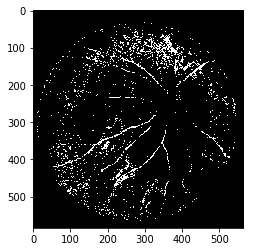

Real:


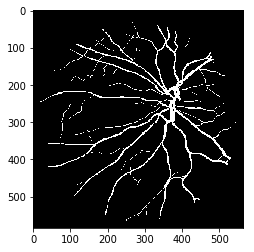

-------------------------------------------------------
Image: 1
Predicting..
[[298163   4813]
 [ 26034    950]]
Predicted:


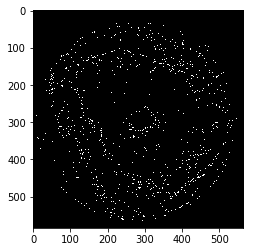

Real:


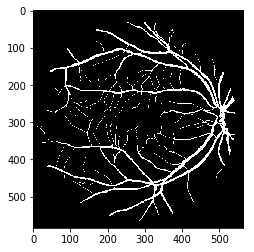

-------------------------------------------------------


In [38]:
show_prediction(tree_clf, X_test, y_test)

In [40]:
show_prediction(rand_forest_clf, X_test, y_test)

Image: 0
Predicting..


NameError: name 'X_scaler' is not defined